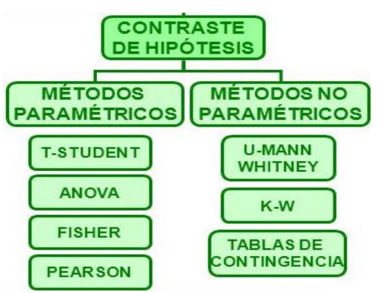

# Sesión 7: EstadísticaInferencial (II)
<hr>

## Contrastes de hipótesis no paramétricos.
<hr>

En los modelos de inferencia estadística estudiados **hemos supuesto ciertas condiciones de partida** en la población o las poblaciones de estudio.
Se han inferido, mediante contrastes de hipótesis, propiedades sobre parámetros de cierto modelo de distribución.

Sin embargo, las hipótesis necesarias para la validez de los procedimientos descritos en la **inferencia paramétrica** (*normalidad,independencia, tamaños de muestra, ...*) no siempre se satisfacen, y por ello son necesarios procedimientos que sean más flexibles en las hipótesis de partida.

Los llamados **métodos no paramétricos** llenan esta laguna, siendo su validez mucho más general. Sus principales ventajas son:

-   Dado que tienen menos hipótesis iniciales que cumplir para su
    aplicación, es improbable usarlos de forma inadecuada, esto es, son
    inocuos.

-   Los cálculos suelen ser más simples y rápidos.

-   No requieren como en los paramétricos escalas numéricas (razón o
    intervalo). A la mayoría le basta con la escala ordinal (o de
    rangos).

El principal inconveniente de las técnicas de inferencia no paramétrica es que desperdician mucha información, y por ello **deben usarse si no existe una alternativa paramétrica**.

VER: 
* http://www.ub.edu/aplica_infor/spss/cap5-6.htm
* https://www.alceingenieria.net/bioestadistica/noparame.pdf
* https://bookdown.org/dietrichson/metodos-cuantitativos/


# <p style="color:#FF0000">Contraste de Shapiro-Wilks (*normalidad*)
<hr>

El test de Shapiro-Wilks plantea la hipótesis nula que una muestra proviene de una distribución normal.

El contraste a estudiar es, dada una muestra aleatoria $x_1, x_2, \dots x_n$ de una población que tiene asociada una función de
distribución continua $F(x)$, entonces 

$$\begin{cases}
        H_0 :&\text{La distribución de F(x) es normal} \\
        H_1 :& \text{La distribución de F(x) NO es normal},
    \end{cases}$$ siendo el estadístico de contraste

$$W = \frac{ \left( \sum_{i=1}^n a_i x_{(i)}  \right)^2  }{\sum_{i = 1}^n 
  (x_i- \overline{x})^2},$$

donde $x_{(i)}$ es el i-ésimo estadístico ordenado, $\overline{x}$ es la
media muestral, y las constantes $a_i$ se definen como
$$(a_1, \dots a_n) = \frac{m^T V^{-1}}{(m^TV^{-1}V^{-1}m)^{1/2}},$$
donde $m = (m_1, \dots, m_n)^T$ son los valores esperados de los
estadísticos ordenados de variables independientes e idénticamente
distribuidas muestreadas a partir de una distribución normal, y $V$ es
la matriz de covarianza de esos estadísticos ordenados. 
El estadístico mide cómo de bien los datos se ajustan a una línea recta cuando son
pintados en un gráfico de probabilidad normal. 

>La hipótesis nula se rechazará si W es demasiado pequeño.
El valor de W puede oscilar entre 0 y 1.

>Interpretación: Siendo la hipótesis nula que la población está distribuida normalmente, si el p-valor es menor a alfa (nivel de significancia) entonces la hipótesis nula NO es aceptadda (*se concluye que los datos no vienen de una distribución normal*). 
Si el p-valor es mayor a alfa, se concluye que no se puede rechazar dicha hipótesis.

La normalidad se verifica confrontando dos estimadores alternativos de la varianza σ²:

un estimador no paramétrico al numerador, y
un estimador paramétrico (varianza muestral), al denominador.

La hipótesis nula se rechazará si W es demasiado pequeño. El valor de W puede oscilar entre 0 y 1.

> Otros test, estudio para el alumno: Kolmogorov-Smirnov.

__[EJERCICIO]__  

Mediante el contraste de Shapiro-Wilks, fijado $\alpha=5\%$ decidir si
la muestra del número de tercios de cerveza al año por individuo en europa 
proviene de una población con distribución normal.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#r06d6d75f824a-4

In [4]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
pylab.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

import pandas as pd
import numpy as np
import scipy.stats as st

drinks = pd.read_csv('drinks.csv')
muestra1 = drinks[drinks.continent=='EU']
muestra2 = drinks[drinks.continent=='AS']

Populating the interactive namespace from numpy and matplotlib


In [7]:
st.shapiro(muestra1.beer_servings)

(0.9592716693878174, 0.11457914113998413)

In [6]:
st.shapiro(muestra2.beer_servings)

(0.7451373934745789, 2.2657687281935068e-07)

Retorna (W,p). Si *p* es superior a nuestro nivel elegido (0,05), no rechazamos la hipótesis nula.

**Nota**: Si rechazamos $H_0$, es decir si no concluimos que la distribución sea normal, no deberíamos usar un test paramétrico.
Por **ejemplo** en el caso siguiente, no rechazamos la $H_0$.

In [10]:
datos_entrada= [15, 12, 11, 18, 15, 15, 9, 19, 14, 13, 11, 12, 18, 15, 16, 14, 16, 17, 15, 17, 
                13, 14, 13, 15, 17, 19, 17, 18, 16, 14]
st.shapiro(datos)


(0.9703197479248047, 0.5479607582092285)

## Otros

A modo de información:
<hr>

### <p style="color:#0101DF"> Durbin-Watson
<hr>

En estadística, el estadístico de Durbin-Watson, desarrollado por el reputado economista Watson, es una estadística de prueba que se utiliza para detectar la presencia de autocorrelación (una relación entre los valores separados el uno del otro por un intervalo de tiempo dado) en los residuos (errores de predicción) de un análisis de la regresión.

### <p style="color:#0101DF"> Kolmogorov-Smirnov
<hr>
La prueba KS solo es válida para distribuciones continuas.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html#scipy.stats.kstest

## <p style="color:#0101DF"> Anderson-Darling
<hr>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html#scipy.stats.anderson

# <p style="color:#FF0000">Otros contrastes


Las siguientes funciones también contrastan si la muestra proviene de una distribución normal. Está basada en los test de D'Agostino y Pearson que combinan la asimetría y la curtosis.

In [11]:
st.normaltest(muestra1.beer_servings)

NormaltestResult(statistic=2.9339459200036773, pvalue=0.2306225332909743)

In [12]:
st.normaltest(muestra2.beer_servings)

NormaltestResult(statistic=35.72753362449318, pvalue=1.745278133372979e-08)

## <p style="color:#0101DF">  Contraste para la mediana


__[EJEMPLO]__ 

Se sabe que, generalemente, el 50% de los individuos de un país toma aproximadamente 
200 tercios de cerveza al año. Sin embargo, debido a restricciones en el consumo de alcohol en los paises asiáticos se cree que este valor es dirente. 

Mediante el contraste de los signos, fijado $\alpha=5\%$, decidir si la mediana en el número de tercios de cerveza al año por individuo es diferente a 200.

Si $x_1, x_2, \dots , x_n$ es una muestra aleatoria de una población
**con distribución continua** y queremos contrastar un valor para la
mediana de la distribución:

$$\begin{cases}
        H_0 :& M_e = M_{e_0} \\
        H_1 :& M_e \neq M_{e_0},
\end{cases}
$$

Se proponen dos procedimientos para la solución de este contraste:

### Rangos signados de Wilcoxon
---------------------------------------------------------------------------------------------------------------------
La prueba de los rangos con signo de Wilcoxon es una prueba no paramétrica para **comparar el rango medio de dos muestras relacionadas y determinar si existen diferencias entre ellas**. 
Se utiliza como alternativa a la prueba t-Student cuando no se puede suponer la normalidad de dichas muestras. 

Es una prueba no paramétrica de comparación de dos muestras relacionadas y por lo tanto no necesita una distribución específica. Se utiliza para comparar dos mediciones relacionadas y determinar si la diferencia entre ellas se debe al azar o no (en este último caso, que la diferencia sea estadísticamente significativa).

El contraste de los rangos con signos de Wilcoxon nos permite contrastar un valor para la mediana de la distribución, en realidad nos **contrasta si hay simetría en la distribución respecto de la mediana**.

El procedimiento para el cálculo del estadístico en el contraste de los
rangos signados de Wilcoxon es el siguiente:

1.  Restar de cada dato la mediana de
    $y_1 = x_1-M_{e_0}, \dots, y_n = x_n-M_{e_0}$

2.  Calculamos los valores absolutos de las diferencias
    $|x_i - M_{e_0}|$. Ordenamos de menor a mayor estos valores
    absolutos, registrando el signo que tengan.

3.  Se asignan rangos (órdenes) de 1 en adelante, de forma que si todos
    los valores son distintos, los rangos serán de 1 a $n$.

4.  En caso de empates, se asigna el mismo rango a los valores
    empatados, obtenido con la media de los rangos que se asignarían a
    los valores si no fueran iguales.

En ocasiones, esta prueba se usa para comparar las diferencias entre dos muestras de datos tomados antes y después del tratamiento, cuyo valor central se espera que sea cero. Las diferencias iguales a cero son eliminadas y el valor absoluto de las desviaciones con respecto al valor central son ordenadas de menor a mayor. A los datos idénticos se les asigna el lugar medio en la serie. La suma de los rangos se hace por separado para los signos positivos y los negativos. S representa la menor de esas dos sumas. Comparamos S con el valor proporcionado por las tablas estadísticas al efecto para determinar si rechazamos o no la hipótesis nula, según el nivel de significación elegido.

In [15]:
# T-tests assume Gaussian errors. We can use a Wilcoxon signed-rank test, that relaxes this assumption:
st.wilcoxon(muestra2.beer_servings - 200.0)

WilcoxonResult(statistic=1.0, pvalue=7.9276854784012444e-09)

#### Contraste de los signos
---------------------------------------------------------------------------------------------------------------------

Permite contrastar un valor para la mediana de la distribución, donde el estadístico de contraste es el número de valores positivos encontradas en la muestra transformada $y_1 = x_1 -M_{e_0}, \dots, y_n = x_n - M_{e_0}$. 

$$M = \frac{N(+) - N(-)}{2}$$

donde:
- $N(+)$ es el número de valores por encima de $M_{e_0}$
- y $N(-)$ es el número de valores por debajo. 
- Los valores iguales a $M_{e_0}$ se descartan. 
- El p-valor se calcula utilizando la distribución Binomial. El estadístico de contraste se distribuye según una binomial $\mathcal{B}(min\{N(+), N(-)\}, (N(+) + N(-)), .5)$

In [18]:
from statsmodels.sandbox.descstats import sign_test
sign_test(muestra2.beer_servings,200.0)


(-21.0, 5.1159076974727189e-12)

**Interpretación**

Utilizamos el valor p para determinar si la mediana de la población es estadísticamente diferente de la mediana hipotética.

Para determinar si la diferencia entre la mediana de la población y la mediana hipotética es estadísticamente significativa, comparamos el valor p con el nivel de significancia. 
Por lo general, un nivel de significancia (*α o alfa*) de 0.05 funciona adecuadamente. 
Un nivel de significancia de 0.05 indica un riesgo de 5% de concluir que existe una diferencia cuando no hay una diferencia real.
- Valor p ≤ α: La diferencia entre las medianas es significativamente diferente (Rechaza H0). La decisión es rechazar la hipótesis nula.
- Valor p > α: La diferencia entre las medianas no es significativamente diferente (No puede rechazar H0): no se puede rechazar la hipótesis nula. No tenemos suficiente evidencia para concluir que la mediana de la población es estadísticamente diferente de la mediana hipotética. 

# <p style="color:#FF0000">Contrastes no paramétricos para dos poblaciones
<hr>

## Dos muestras dependientes (emparejadas)
<hr>

Vamos a trabajar en este apartado con dos muestras de dos poblaciones, es decir, $n$ pares de mediciones
$(x_1, y_1), (x_2, y_2), \dots (x_n, y_n)$ y **se quiere ver si la mediana de la población de las diferencias $y_i-x_i$ es cero o no**. 

Es decir,

$$
\begin{cases}
    H_0 :& M_{e_X} = M_{e_Y} \\
    H_1 :& M_{e_X} \neq M_{e_Y}
\end{cases}
\quad \equiv \quad
\begin{cases}
    H_0 :& M_{e_X} - M_{e_Y} = 0\\
    H_1 :& M_{e_X} - M_{e_Y} \neq 0
\end{cases}
$$ 
  
Para estos casos, pueden aplicarse $y_i - x_i$
cualquiera de los contrastes de los signos vistos anteriormente.

__[Ejemplo]__ 

En un estudio sobre número de reclamaciones a un servicio de atención 
al cliente, se quiere comprobar si después de si añadir una serie de protocolos 
en el proceso de ayuda a los usuarios, el número mediano de reclamaciones baja 
en dicho servicio. Para ello se registra el número de reclamaciones a 10 empleados
elegidos al azar. 


|Empleado|   1|   2|    3|   4|    5|   6|   7|    8|   9|  10|
|--------|----|----|-----|----|-----|----|----|-----|----|----|
|Antes (X)|56| 56|  147|  58|  121|  57|  49|  118|  63|  75|
|Después (Y) |47| 63|  125|  26|   99|  36|  34|   90|  50|  59|

Fijado $\alpha = 5\%$, contrastar la hipótesis de que la mediana antes
sea mayor que la mediana después de la inclusión de los protocolos.

In [13]:
data1 = np.array([56, 56,  147,  58,  121,  57,  49,  118,  63, 75])
data2 = np.array([47, 63,  125,  26,   99,  36,  34, 90, 50, 59])

st.wilcoxon(data1, data2)  

WilcoxonResult(statistic=1.0, pvalue=0.006874035817356707)

> **Nota**. Cuando $n \geq 50$, la distribución muestral $W_{+}$ o
$|W_{-}|$ se aproxima a la distribución normal con media
$\mu_W = \frac{n(n+4)}{4}$ y varianza
$\sigma_W^2 = \frac{n(n+1)(2n+1)}{24}$. Podemos utilizar la tipificación
$z=\frac{W_{+}-\mu_W}{\sigma_W}$ para utilizar la tabla normal
tipificada.

## Dos muestras independientes: test de Mann-Whitney
<hr>

La prueba de **Mann-Whitney** se usa para comprobar la homogeneidad de dos muestras que provienen de poblaciones independientes y observaciones de variables ordinales o continuas. 

Así pues, sean $x_1, x_2, \dots, x_m$ e $y_1, y_2, \dots, y_n$ muestras de tamaño $m$ y $n$ de dos poblaciones
continuas, queremos contrastar

$$\begin{cases}
    H_0 :& \text{Las distribuciones X e Y son iguales} \\
    H_1 :& \text{Las distribuciones X e Y NO son iguales}
  \end{cases}
$$

Para calcular el estadístico de contraste se asigna a cada uno de los valores de las dos muestras su rango (de forma conjunta) para construir

$$\begin{aligned}
  U_1 &=& n_1 n_2 + \frac{n_1(n_1+1)}{2} - R_1 \\
  U_2 &=& n_1 n_2 + \frac{n_2(n_2+1)}{2} - R_2,\end{aligned}
$$ 
  
donde
$n_1$ y $n_2$ son los tamaños respectivos de cada muestra; $R_1$ y $R_2$
es la suma de los rangos de las observaciones de las muestras 1 y 2
respectivamente. El estadístico de contraste se define como el mínimo de
$U_1$ y $U_2$.

> **Nota**. Los cálculos tienen que tener en cuenta la presencia de
observaciones idénticas a la hora de ordenarlas, asignando la media del
rango que les correspondería.


__[Ejemplo]__ Fijado $\alpha = 10\%$, ¿podríamos considerar que los individuos europeos tienen un comportamiento similar a los individuos asiaticos en la ingesta en el número de tercios de cerveza al año?

In [15]:
st.mannwhitneyu(muestra1.beer_servings, muestra2.beer_servings)

MannwhitneyuResult(statistic=197.0, pvalue=3.7948455133549184e-11)

## Test exacto de Fisher para proporciones en poblaciones independientes
<hr>

>Se recomienda utilizar el **test exacto de Fisher** cuando queremos comparar dos grupos respecto a una variable dicotómica, o queremos valorar la relación que existe entre dos variables cualitativas dicotómicas, y **el tamaño muestral es pequeño**.

>Cuando el tamaño muestral es grande (*30 individuos por grupo*) y queremos comparar dos grupos respecto a una variable dicotómica, podemos optar por el test de comparación de proporciones visto en los contrastes
paramétricos. Si lo que queremos es valorar la relación que existe entre dos variables cualitativas dicotómicas, podemos portar por la medida $\chi^2$.

**El test exacto de Fisher se basa en la distribución hipergeométrica**, calculando probabilidades para cada una de las combinaciones de las celdas en una tabla de contingencia $2\times2$. Es importante hacer hincapié que las **distribuciones marginales están fijas durante todo el proceso**. 

__[Ejemplo]__ La siguiente tabla muestra a varios pacientes de dos grupos diferentes,
sedentarios y no sedentarios, así como el registro de cuales de ellos
realizan más de 150 minutos semanales de ejercicio físico.

|Paciente|          1|    2|    3|    4|    5|    6|    7|    8|    9|    10|
|---------|----------|-----|-----|-----|-----|-----|-----|-----|-----|------|
|Sedentario (X)|   SI|   SI|   SI|   SI|   NO|   NO|   NO|   NO|   NO|   NO |
|EjerFísico (Y)|   SI|   SI|   NO|   SI|   NO|   NO|   NO|   NO|   SI|   NO |
  
Fijado $\alpha = 5\%$, contrastar la hipótesis de que las proporciones
entre pacientes que realizan ejercicio físico sean diferentes,
dependiendo de si es o no sedentario.

(**nota**: Variar los datos para observar el cambio en el nivel de
significación)

In [16]:
data = pd.DataFrame({'X': ['SI',  'SI',   'SI',   'SI',   'NO',   'NO',   'NO',   'NO',   'NO',   'NO'],
                     'Y': ['SI',  'SI',   'NO',   'SI',   'NO',   'NO',   'NO',   'NO',   'SI',   'NO']
                    })
A = pd.crosstab(data.X, data.Y)
oddsratio, pvalue = st.fisher_exact(A)
print("Oddsratio y p-valor:              Odds = %g  p-valor = %g" % (oddsratio, pvalue))

Oddsratio y p-valor:              Odds = 15  p-valor = 0.190476


## Test de MacNemar para proporciones en poblaciones dependientes
<hr>

Se utiliza cuando se quieren comparar dos proporciones y las poblaciones
son dependientes. El planteamiento parte de tomar una muestra de
individuos, a cada uno de los cuales se mira si tienen o no una
característica en dos ocasiones, por ejemplo antes y después de un
tratamiento, o con dos tratamientos distintos, o en dos situaciones
distintas generadas por una intervención, etc. En este caso, los
individuos de la muestra son clasificados según presenten (SI) o no (NO)
la característica, y se disponen los datos de la forma:

| | Sí| No|
|---|---|---|
|Sí | $n_{11}$ | $n_{12}$ |
|No | $n_{21}$ | $n_{22}$ |

donde:

-   $n_{11}$ es el número de individuos que tienen la característica en
    ambas ocasiones.

-   $n_{12}$ son los que la tienen en A pero no en B.

-   $n_{21}$ son los que la tienen en B pero no en A.

-   $n_{22}$ los que no la tienen ni en A ni en B.

Siendo las hipótesis, EC y RC de este contraste: 

$$\nonumber
\begin{cases}
    H_0 :& \pi_A = \pi_B \\
    H_1 :& \pi_A \neq \pi_B
  \end{cases}, \quad X^2 = \frac{(|n_{12}-n_{21}|-1)^2}{n_{12}-n_{21}}, \quad
   \mbox{ y } RC = \{ X^2 > \chi^2_{1-\alpha}(1)\}$$

(**Nota**. Para que la aproximación que se utiliza en la distribución
del EC sea aceptable, conviene que $n_{12}+n_{21}>10$)

__[Ejemplo]__ Se ha realizado una encuesta a 125 individuos que son usuarios al mismo
tiempo de Centros de Salud y Ambulatorios. En dicha encuesta se ha
recogido su opinión favorable (SI) o desfavorable (NO) a dichos sistemas
de asistencia. Los datos recogidos aparecen en la siguiente tabla

| |Sí| No |
|---|---|---|
|Sí|27   |35|
|No|43   |20|
  
Para un $\alpha = 5\%$, ¿se tiene la misma opinión de los sistemas?

In [17]:
from statsmodels.sandbox.stats.runs import mcnemar
X2, pvalue = mcnemar([[27,35],[43,20]], exact=False) # exact=False para realizar la aproximación Chi-cuadrada

print("EC y p-valor:              X2 = %g  p-valor = %g" % (X2, pvalue))

EC y p-valor:              X2 = 0.628205  p-valor = 0.428014
